In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

model_save_path = './PredictModel/3_citys_covid_predict.hdf5'
DATA_PATH = [
    './Data/13_Yên Bái_covid_data.csv', 
    './Data/29_Nghệ An_covid_data.csv',
    './Data/17_Quảng Ninh_covid_data.csv',
]

# Data visualizing

In [2]:
df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df[path] = pd.read_csv(DATA_PATH[path])
    df[path].drop(df[path].tail(26).index,inplace=True)
    for idx in range(len(df[path].index)):
        df[path].iat[idx, 0] = datetime.strptime(df[path].iat[idx, 0], '%Y-%m-%d %H:%M:%S')
    df[path] = df[path].sort_values(by=['date'])
    df[path] = df[path].drop(columns=['Unnamed: 9'])

In [3]:
df[0].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,6855,1934183.0,0.0,0.0,2.0,20868.0,0.0,0.0
594,2022-04-13 00:00:00,6814,1940997.0,0.0,0.0,1.0,20869.0,0.0,0.0
634,2022-04-14 00:00:00,6374,1947371.0,0.0,0.0,4.0,20873.0,0.0,0.0
197,2022-04-15 00:00:00,5460,1952831.0,0.0,0.0,2.0,20875.0,0.0,0.0
34,2022-04-16 00:00:00,4926,1957757.0,0.0,0.0,1.0,20876.0,0.0,0.0
607,2022-04-17 00:00:00,4313,1961086.0,0.0,0.0,0.0,20876.0,0.0,0.0
591,2022-04-18 00:00:00,3983,1962167.0,0.0,0.0,0.0,20876.0,0.0,0.0
191,2022-04-19 00:00:00,4136,1969512.0,0.0,0.0,1.0,20877.0,0.0,0.0
111,2022-04-20 00:00:00,3274,1972786.0,0.0,0.0,1.0,20878.0,0.0,0.0
485,2022-04-21 00:00:00,2956,1975742.0,0.0,0.0,0.0,20878.0,0.0,0.0


In [4]:
df[1].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,17233,7426764.0,0.0,0.0,9.0,23346.0,0.0,0.0
594,2022-04-13 00:00:00,18110,7444874.0,0.0,0.0,3.0,23349.0,0.0,0.0
634,2022-04-14 00:00:00,16669,7461543.0,0.0,0.0,7.0,23356.0,0.0,0.0
197,2022-04-15 00:00:00,14890,7530391.0,0.0,0.0,5.0,23361.0,0.0,0.0
34,2022-04-16 00:00:00,13519,7548790.0,0.0,0.0,2.0,23363.0,0.0,0.0
607,2022-04-17 00:00:00,11248,7558856.0,0.0,0.0,0.0,23363.0,0.0,0.0
591,2022-04-18 00:00:00,9953,7564353.0,0.0,0.0,1.0,23364.0,0.0,0.0
191,2022-04-19 00:00:00,10348,7610492.0,0.0,0.0,5.0,23369.0,0.0,0.0
111,2022-04-20 00:00:00,9474,7619966.0,0.0,0.0,1.0,23370.0,0.0,0.0
485,2022-04-21 00:00:00,8854,7628811.0,0.0,0.0,0.0,23370.0,0.0,0.0


In [5]:
df[2].tail(20)

,date,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
571,2022-04-12 00:00:00,10346,3062196.0,0.0,0.0,4.0,21112.0,0.0,0.0
594,2022-04-13 00:00:00,10927,3073123.0,0.0,0.0,1.0,21113.0,0.0,0.0
634,2022-04-14 00:00:00,9836,3082959.0,0.0,0.0,5.0,21118.0,0.0,0.0
197,2022-04-15 00:00:00,8607,3091566.0,0.0,0.0,2.0,21120.0,0.0,0.0
34,2022-04-16 00:00:00,7758,3104204.0,0.0,0.0,2.0,21122.0,0.0,0.0
607,2022-04-17 00:00:00,6501,3109721.0,0.0,0.0,0.0,21122.0,0.0,0.0
591,2022-04-18 00:00:00,6108,3112707.0,0.0,0.0,0.0,21122.0,0.0,0.0
191,2022-04-19 00:00:00,6302,3122367.0,0.0,0.0,2.0,21124.0,0.0,0.0
111,2022-04-20 00:00:00,5386,3127753.0,0.0,0.0,1.0,21125.0,0.0,0.0
485,2022-04-21 00:00:00,4756,3132509.0,0.0,0.0,0.0,21125.0,0.0,0.0


In [6]:
# Summary Stats
df[0].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,2604.563758,2.660338e+05,276.375839,6259.585235,28.065772,6223.883221,1.826846,490.343624
std,6222.861941,4.809431e+05,1645.803249,21970.986194,71.764322,8672.482470,6.028457,481.989891
min,0.000000,1.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.900000e+02,0.000000,0.000000,0.000000,31.000000,0.000000,18.000000
50%,6.000000,7.530000e+02,0.000000,6.000000,0.000000,31.000000,0.000000,450.000000
75%,2175.000000,4.315320e+05,2.000000,61.000000,15.000000,16681.000000,0.000000,678.000000
max,41661.000000,1.994409e+06,38505.000000,126916.000000,663.000000,20880.000000,81.000000,1361.000000


In [7]:
# Summary Stats
df[1].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,7271.806711,6.671415e+05,294.546309,6806.571812,31.449664,6501.087248,10.347651,2030.253691
std,21452.325126,1.730523e+06,1657.845760,22746.163939,72.111253,9128.302073,38.326991,2800.545610
min,0.000000,3.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.330000e+02,0.000000,0.000000,0.000000,31.000000,0.000000,32.000000
50%,23.000000,2.126000e+03,0.000000,39.000000,0.000000,31.000000,0.000000,780.000000
75%,4204.000000,4.517010e+05,7.000000,281.000000,35.000000,16779.000000,3.000000,2010.000000
max,129859.000000,7.729766e+06,38587.000000,129566.000000,666.000000,23378.000000,401.000000,7755.000000


In [8]:
# Summary Stats
df[2].describe()

,case_by_day,case_by_time,active_by_day,active_by_time,death_by_day,death_by_time,recovered_by_day,recovered_by_time
count,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,3609.256376,3.463726e+05,277.312752,6284.479195,28.405369,6243.710067,2.004027,546.836242
std,9455.061967,7.288929e+05,1647.050845,22021.500842,71.723910,8705.467707,6.283511,533.074205
min,0.000000,3.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.280000e+02,0.000000,0.000000,0.000000,31.000000,0.000000,29.000000
50%,8.000000,8.600000e+02,0.000000,10.000000,0.000000,31.000000,0.000000,483.000000
75%,2753.000000,4.327760e+05,2.000000,94.000000,18.000000,16684.000000,1.000000,778.000000
max,59982.000000,3.166727e+06,38520.000000,127064.000000,664.000000,21133.000000,81.000000,1504.000000


In [9]:
df_filtered = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    df_filtered[path] = df[path][df[path]['date'] >= datetime.strptime('1/1/2021 00:00', '%m/%d/%Y %H:%M')]

<AxesSubplot:xlabel='date'>

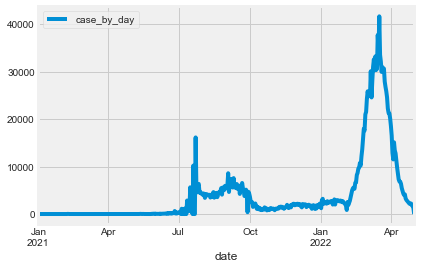

In [10]:
df_filtered[0].plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

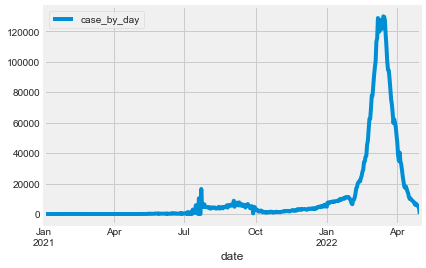

In [11]:
df_filtered[1].plot(x ='date', y='case_by_day', kind = 'line')

<AxesSubplot:xlabel='date'>

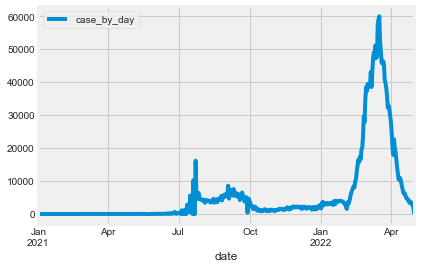

In [12]:
df_filtered[2].plot(x ='date', y='case_by_day', kind = 'line')

# Predicting case by day

In [13]:
new_df = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    new_df[path] = df_filtered[path].set_index('date')

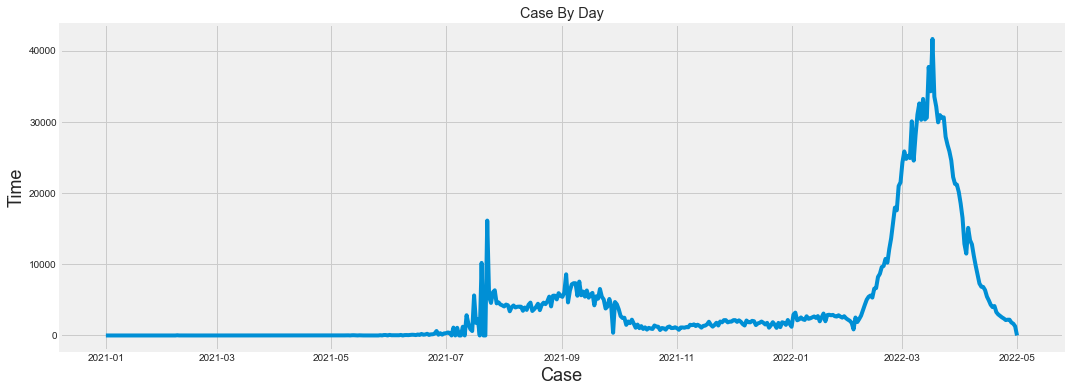

In [14]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[0]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

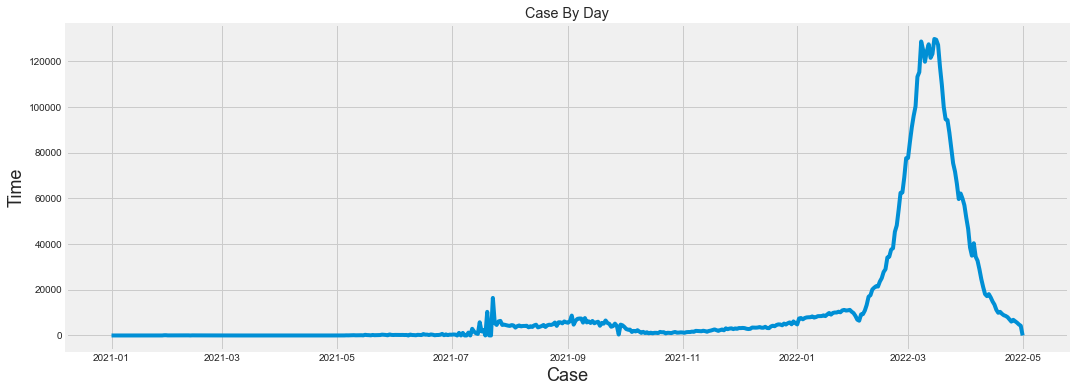

In [15]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[1]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

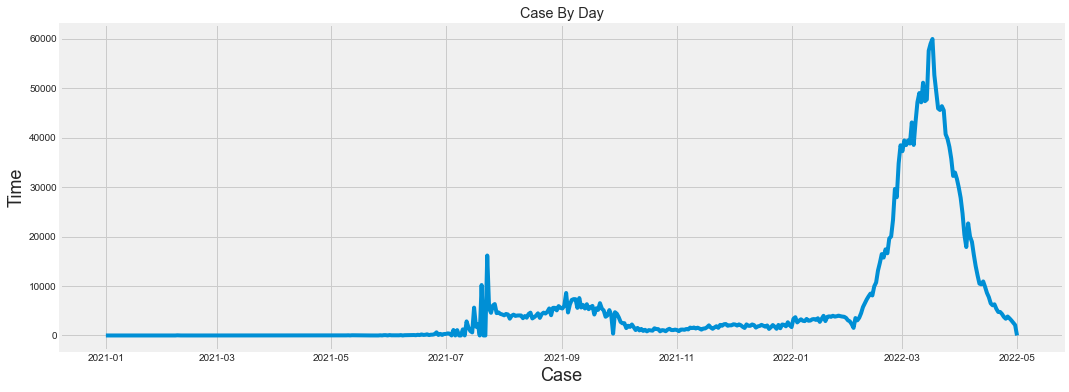

In [16]:
plt.figure(figsize=(16,6))
plt.title('Case By Day')
plt.plot(new_df[2]['case_by_day'])
plt.xlabel('Case', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.show()

In [17]:
data = [None] * len(DATA_PATH)
dataset = [None] * len(DATA_PATH)
training_data_len = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create a new dataframe with only the 'Close column 
    data[path] = new_df[path].filter(['case_by_day'])
    # Convert the dataframe to a numpy array
    dataset[path] = data[path].values
    # Get the number of rows to train the model on
    # training_data_len[path] = int(np.ceil(len(dataset[path]) * .95 ))
    training_data_len[path] = len(dataset[path]) - 30
    print(training_data_len[path])

456
456
456


In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = [None] * len(DATA_PATH)
scaled_data = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    scaler[path] = MinMaxScaler(feature_range=(0,1))
    scaled_data[path] = scaler[path].fit_transform(dataset[path])

scaled_data

[array([[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [4.80065289e-05],
        [2.40032644e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.40032644e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [4.80065289e-05],
        [1.20016322e-04],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.40032644e-05],
        [2.40032644e-05],
        [9.60130578e-05],
        [0.00000000e+00],
        [2.40032644e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [4.80065289e-05],
        [0.00000000e+00],
        [1.68022851e-04],
        [2.40032644e-05],
        [4.80065289e-05],
        [0.00000000e+00],
        [2.40032644e-05],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.40032644e-05],
        [2.40032644e-05],
        [0.00000000e+00],
        [6.9

In [19]:
DATA_LEN = 60
train_data = [None] * len(DATA_PATH)
test_data = [None] * len(DATA_PATH)
x_train = [None] * len(DATA_PATH)
y_train = [None] * len(DATA_PATH)
x_test = [None] * len(DATA_PATH)
y_test = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Create the training data set 
    # Create the scaled training data set
    train_data[path] = scaled_data[path][0:int(training_data_len[path]), :]
    # Split the data into x_train and y_train data sets
    x_train[path] = []
    y_train[path] = []

    for idx in range(DATA_LEN, len(train_data[path])):
        x_train[path].append(train_data[path][idx - DATA_LEN: idx, 0])
        y_train[path].append(train_data[path][idx, 0])

    # Convert the x_train and y_train to numpy arrays 
    x_train[path], y_train[path] = np.array(x_train[path]), np.array(y_train[path])

    # Reshape the data
    x_train[path] = np.reshape(x_train[path], (x_train[path].shape[0], x_train[path].shape[1], 1))
    
    # Create the testing data set
    test_data[path] = scaled_data[path][training_data_len[path] - DATA_LEN: , :]
    # Create the data sets x_test and y_test
    x_test[path] = []
    y_test[path] = scaled_data[path][training_data_len[path]:, :]
    for i in range(DATA_LEN, len(test_data[path])):
        x_test[path].append(test_data[path][i - DATA_LEN: i, 0])

    # Convert the data to a numpy array
    x_test[path], y_test[path] = np.array(x_test[path]), np.array(y_test[path])

    # Reshape the data
    x_test[path] = np.reshape(x_test[path], (x_test[path].shape[0], x_test[path].shape[1], 1 ))
    
x_train, y_train, x_test, y_test

([array([[[0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         [[0.00000000e+00],
          [0.00000000e+00],
          [4.80065289e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         [[0.00000000e+00],
          [4.80065289e-05],
          [2.40032644e-05],
          ...,
          [0.00000000e+00],
          [0.00000000e+00],
          [0.00000000e+00]],
  
         ...,
  
         [[6.48808238e-02],
          [5.78958738e-02],
          [5.33832601e-02],
          ...,
          [5.90480305e-01],
          [5.34144644e-01],
          [5.11125513e-01]],
  
         [[5.78958738e-02],
          [5.33832601e-02],
          [4.94947313e-02],
          ...,
          [5.34144644e-01],
          [5.11125513e-01],
          [5.08677180e-01]],
  
         [[5.33832601e-02],
          [4.9494731

In [20]:
from functools import reduce

X_train = x_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_train[1:], x_train[0])
Y_train = y_train[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_train[1:], y_train[0])
X_test = x_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, x_test[1:], x_test[0])
Y_test = y_test[0] if len(DATA_PATH) == 1 else reduce(lambda x, y: x + y, y_test[1:], y_test[0])

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model

# Build the LSTM model
model = Sequential() 
model.add(LSTM(30, return_sequences=True, input_shape=(DATA_LEN, 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 20)                4080      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,141
Trainable params: 8,141
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Train the model
model.fit(
    X_train, 
    Y_train, 
    batch_size=8, 
    epochs=50,
    validation_data=(X_test, Y_test)
)

Epoch 1/50
50/50 [==============================] - 12s 86ms/step - loss: 0.0698 - val_loss: 0.8695
Epoch 2/50
50/50 [==============================] - 3s 69ms/step - loss: 0.0256 - val_loss: 0.7610
Epoch 3/50
50/50 [==============================] - 2s 48ms/step - loss: 0.0204 - val_loss: 0.2198
Epoch 4/50
50/50 [==============================] - 2s 47ms/step - loss: 0.0126 - val_loss: 0.0350
Epoch 5/50
50/50 [==============================] - 3s 51ms/step - loss: 0.0095 - val_loss: 0.0271
Epoch 6/50
50/50 [==============================] - 3s 56ms/step - loss: 0.0097 - val_loss: 0.0115
Epoch 7/50
50/50 [==============================] - 3s 51ms/step - loss: 0.0066 - val_loss: 0.0067
Epoch 8/50
50/50 [==============================] - 2s 43ms/step - loss: 0.0079 - val_loss: 0.0408
Epoch 9/50
50/50 [==============================] - 2s 43ms/step - loss: 0.0073 - val_loss: 0.0049
Epoch 10/50
50/50 [==============================] - 2s 43ms/step - loss: 0.0069 - val_loss: 0.0131
Epoch 11

In [24]:
train_predictions = [None] * len(DATA_PATH)
test_predictions = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    # Get the models predicted price values
    train_predictions[path] = model.predict(x_train[path])
    test_predictions[path] = model.predict(x_test[path])
    train_predictions[path] = scaler[path].inverse_transform(train_predictions[path])
    test_predictions[path] = scaler[path].inverse_transform(test_predictions[path])

    # Get the root mean squared error (RMSE)
    # train_rmse = np.sqrt(np.mean(((train_predictions[path] - scaler.inverse_transform(y_train[path])) ** 2)))
    test_rmse = np.sqrt(np.mean(((test_predictions[path] - scaler[path].inverse_transform(y_test[path])) ** 2)))
    print(test_rmse)

3770.8967898027768
9964.694763250744
5814.565897781145


In [25]:
val_loss = model.evaluate(X_test, Y_test, batch_size=8)

4/4 [==============================] - 0s 7ms/step - loss: 0.0451


In [26]:
train = [None] * len(DATA_PATH)
test_valid = [None] * len(DATA_PATH)
train_valid = [None] * len(DATA_PATH)
for path in range(len(DATA_PATH)):
    train[path] = data[path][:training_data_len[path]]
    test_valid[path] = data[path][training_data_len[path]:]
    test_valid[path].insert(1, 'case_by_day_test_predict', test_predictions[path])
    train_valid[path] = data[path][60:training_data_len[path]]
    train_valid[path].insert(1, 'case_by_day_train_predict', train_predictions[path])

In [27]:
# for path in range(len(DATA_PATH)):
#     for idx in range(len(valid[path].index)):
#         valid[path].iat[idx, 0] = 0 if valid[path].iat[idx, 0] < 0 else valid[path].iat[idx, 0]
#         valid[path].iat[idx, 1] = 0 if valid[path].iat[idx, 1] < 0 else valid[path].iat[idx, 1]

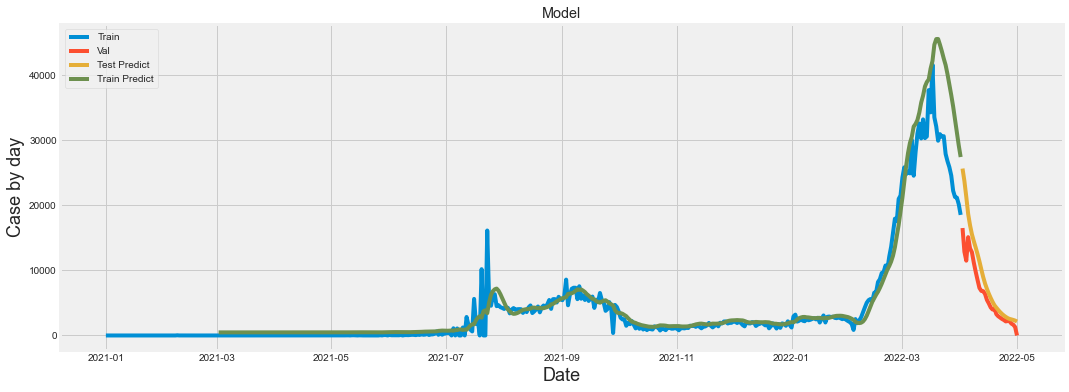

In [28]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[0]['case_by_day'])
plt.plot(test_valid[0][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[0]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [29]:
# # Show the valid and predicted prices
# valid[0]

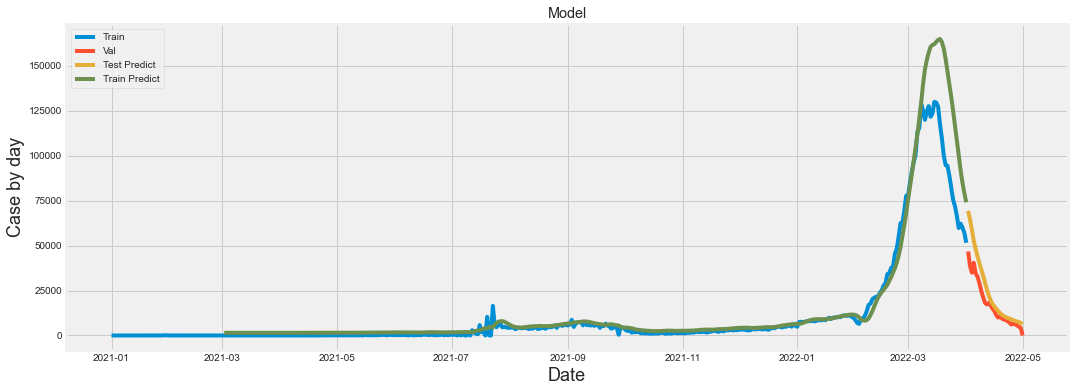

In [30]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[1]['case_by_day'])
plt.plot(test_valid[1][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[1]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [31]:
# # Show the valid and predicted prices
# valid[1]

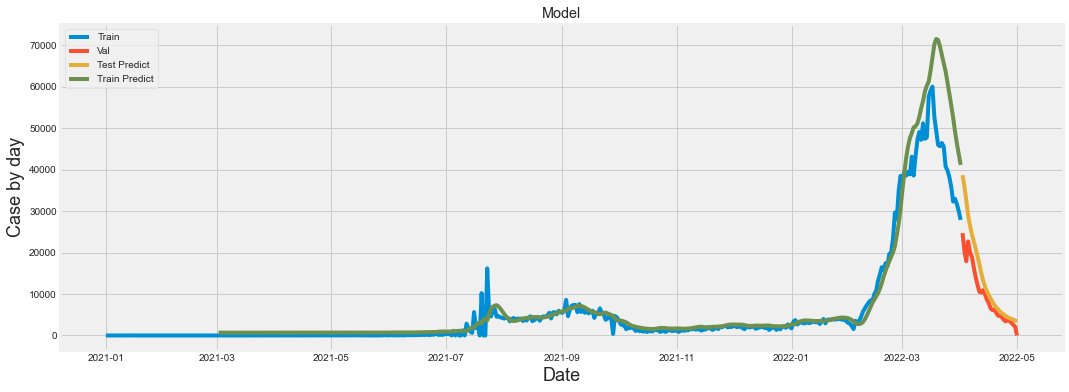

In [32]:
# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Case by day', fontsize=18)
plt.plot(train[2]['case_by_day'])
plt.plot(test_valid[2][['case_by_day', 'case_by_day_test_predict']])
plt.plot(train_valid[2]['case_by_day_train_predict'])
plt.legend(['Train', 'Val', 'Test Predict', 'Train Predict'], loc='upper left')
plt.show()

In [33]:
# # Show the valid and predicted prices
# valid[2]

In [34]:
model.save(model_save_path, include_optimizer=False)